/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_13923/3899280556.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_13923/3899280556.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_13923/3899280556.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_13923/3899280556.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

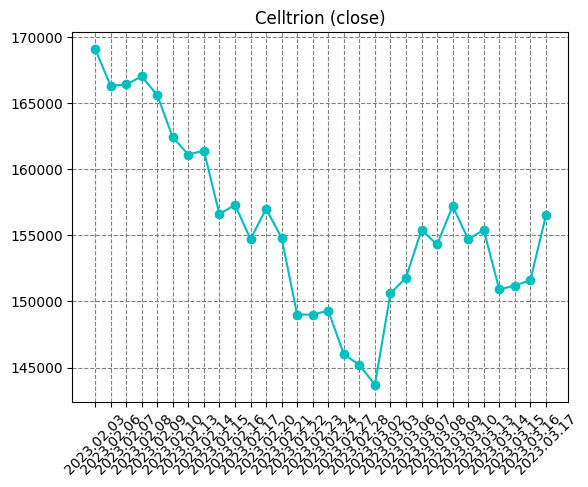

In [1]:
# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]  # ①
df = df.sort_values(by='날짜')  # ②

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)  # ③
plt.plot(df['날짜'], df['종가'], 'co-')  # ④
plt.grid(color='gray', linestyle='--')
plt.show()

In [6]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates    
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() 
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>